# Notebook details

In [1]:
def setup_notebook(fix_python_path=True, reduce_margins=True, plot_inline=True):
    if reduce_margins:
        # Reduce side margins of the notebook
        from IPython.core.display import display, HTML
        display(HTML("<style>.container { width:100% !important; }</style>"))

    if fix_python_path:
        # add egosocial to the python path
        import os, sys
        sys.path.extend([os.path.dirname(os.path.abspath('.'))])

    if plot_inline:
        # Plots inside cells
        %matplotlib inline
    
    global __file__
    __file__ = 'Notebook'

setup_notebook()

# Imports and Constants Definition

In [2]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import argparse
import json
import logging
import os

import IPython
import ipywidgets as widgets

import cv2

import egosocial
from egosocial import config
from egosocial.core.types import FaceClustering
from egosocial.utils.filesystem import check_directory 
from egosocial.utils.filesystem import create_directory
from egosocial.utils.filesystem import list_files_in_segment
from egosocial.utils.filesystem import list_segments
from egosocial.utils.logging import setup_logging
from egosocial.utils.parser import FACE_DETECTION
from egosocial.utils.parser import load_faces_from_file

DOMAINS = ['Attachent', 'Reciprocity', 'Mating', 'Heirarchical Power', 'Coalitional Group']
RELATIONS = [
    ['father-child', 'mother-child', 'grandpa-grandchild', 'grandma-grandchild'],
    ['friends', 'siblings', 'classmates'],
    ['lovers/spouses'],
    ['presenter-audience', 'teacher-student', 'trainer-trainee', 'leader-subordinate', 'customer-staff'],
    ['band members', 'dance team members', 'sport team members', 'colleages'],
]

def relation_to_domain(rel_label):
    for dom_idx, grouped_relations in enumerate(RELATIONS):
        for relation in grouped_relations:
            if rel_label == relation:
                return DOMAINS[dom_idx]
    
    for domain in DOMAINS:
        if domain in rel_label:
            return domain
    
    return rel_label

In [3]:
if not os.path.isdir(egosocial.config.TMP_DIR):
    os.mkdir(egosocial.config.TMP_DIR)

setup_logging(egosocial.config.LOGGING_CONFIG,
              log_dir=egosocial.config.LOGS_DIR)

In [4]:
#!pip install pandas
import pandas as pd

def load_labels(labels_dir, labels_file_name):
    segments = sorted(list_segments(labels_dir), key=int)
    labels_data = []
    
    for segment_id in segments:
        segm_labels_dir = os.path.join(labels_dir, segment_id)
        check_directory(segm_labels_dir, 'Labels')    
        
        labels_file = os.path.join(segm_labels_dir, labels_file_name)
        if not os.path.exists(labels_file):
            continue
        
        with open(labels_file, 'r') as json_file:
            labels_per_segment = json.load(json_file)
        
        for labels_group_id in sorted(labels_per_segment, key=lambda x : int(x['group_id'])):
            label_list, group_id = labels_group_id['labels'], int(labels_group_id['group_id'])
            if not label_list:
                label_list = ['unknown']

            for str_label in label_list:
                entry = int(segment_id), int(group_id), str_label, relation_to_domain(str_label)
                labels_data.append(entry)
    
    labels_df = pd.DataFrame(labels_data, columns=['segment_id', 'group_id', 'label', 'domain_label'])
    
    return labels_df

In [8]:
BASE_DIR = os.path.join(egosocial.config.TMP_DIR, 'egocentric', 'datasets')
#base_labels_dir = '/media/emasa/OS/Users/Emanuel/Downloads/NO_SYNC/Social Segments/labels/'

base_labels_dir = os.path.join(BASE_DIR, 'labels')
labels_file_name = 'labels.json'

train_labels_dir = os.path.join(base_labels_dir, 'train')
train_labels_df = load_labels(train_labels_dir, labels_file_name)

2018-03-24 16:07:38,787 - egosocial.utils.filesystem - DEBUG - Checked Base directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train
2018-03-24 16:07:38,790 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/1
2018-03-24 16:07:38,795 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/2
2018-03-24 16:07:38,801 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/3
2018-03-24 16:07:38,804 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/4
2018-03-24 16:07:38,806 - egosocial.utils.filesystem - DEBU

2018-03-24 16:07:38,844 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/44
2018-03-24 16:07:38,845 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/45
2018-03-24 16:07:38,846 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/46
2018-03-24 16:07:38,846 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/47
2018-03-24 16:07:38,847 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/48
2018-03-24 16:07:38,848 - egosocial.utils.filesyst

2018-03-24 16:07:38,878 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/88
2018-03-24 16:07:38,878 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/89
2018-03-24 16:07:38,879 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/90
2018-03-24 16:07:38,880 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/91
2018-03-24 16:07:38,881 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/train/92
2018-03-24 16:07:38,881 - egosocial.utils.filesyst

2018-03-24 16:07:48,387 - matplotlib.font_manager - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


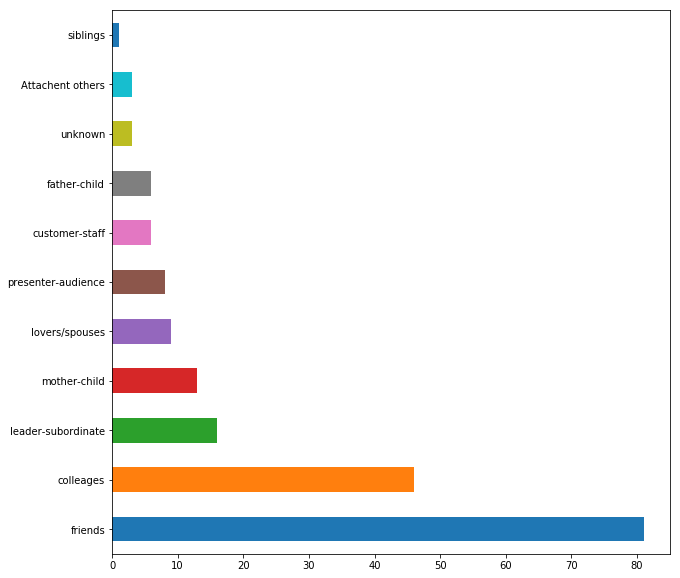

In [9]:
#train_labels_df.label.value_counts().plot(kind='pie', figsize=(10, 10))
train_labels_df.label.value_counts().plot(kind='barh', figsize=(10, 10))

In [10]:
test_labels_dir = os.path.join(base_labels_dir, 'test')

test_labels_df = load_labels(test_labels_dir, labels_file_name)

2018-03-24 16:08:00,702 - egosocial.utils.filesystem - DEBUG - Checked Base directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test
2018-03-24 16:08:00,704 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/1
2018-03-24 16:08:00,708 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/2
2018-03-24 16:08:00,713 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/3
2018-03-24 16:08:00,736 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/4
2018-03-24 16:08:00,741 - egosocial.utils.filesystem - DEBUG - C

2018-03-24 16:08:00,808 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/44
2018-03-24 16:08:00,809 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/45
2018-03-24 16:08:00,810 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/46
2018-03-24 16:08:00,811 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/47
2018-03-24 16:08:00,812 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/48
2018-03-24 16:08:00,813 - egosocial.utils.filesystem - 

2018-03-24 16:08:00,843 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/88
2018-03-24 16:08:00,843 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/89
2018-03-24 16:08:00,844 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/90
2018-03-24 16:08:00,845 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/91
2018-03-24 16:08:00,846 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/test/92
2018-03-24 16:08:00,846 - egosocial.utils.filesystem - 

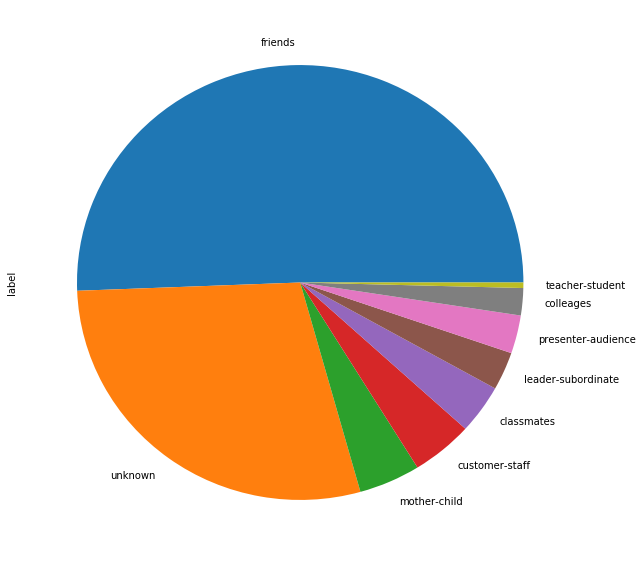

In [11]:
test_labels_df.label.value_counts().plot(kind='pie', figsize=(10, 10))
#test_labels_df.label.value_counts().plot(kind='barh', figsize=(10, 10))

In [12]:
extended_labels_dir = os.path.join(base_labels_dir, 'extended')
extended_labels_df = load_labels(extended_labels_dir, labels_file_name)

2018-03-24 16:08:22,672 - egosocial.utils.filesystem - DEBUG - Checked Base directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended
2018-03-24 16:08:22,678 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/1
2018-03-24 16:08:22,682 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/2
2018-03-24 16:08:22,687 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/3
2018-03-24 16:08:22,691 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/4
2018-03-24 16:08:22,695 - egosocial.utils.fi

2018-03-24 16:08:22,738 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/44
2018-03-24 16:08:22,739 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/45
2018-03-24 16:08:22,740 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/46
2018-03-24 16:08:22,740 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/47
2018-03-24 16:08:22,741 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/48
2018-03-24 16:08:22,742 - egosocial

2018-03-24 16:08:22,772 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/95
2018-03-24 16:08:22,773 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/96
2018-03-24 16:08:22,774 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/97
2018-03-24 16:08:22,774 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/98
2018-03-24 16:08:22,775 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/99
2018-03-24 16:08:22,776 - egosocial

2018-03-24 16:08:22,806 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/144
2018-03-24 16:08:22,807 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/145
2018-03-24 16:08:22,808 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/146
2018-03-24 16:08:22,808 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/147
2018-03-24 16:08:22,809 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/148
2018-03-24 16:08:22,810 - egos

2018-03-24 16:08:22,840 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/190
2018-03-24 16:08:22,840 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/191
2018-03-24 16:08:22,841 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/192
2018-03-24 16:08:22,842 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/193
2018-03-24 16:08:22,843 - egosocial.utils.filesystem - DEBUG - Checked Labels directory: /home/shared/Documents/final_proj/repo/egosocialdetector/src/tmp/egocentric/datasets/labels/extended/194
2018-03-24 16:08:22,843 - egos

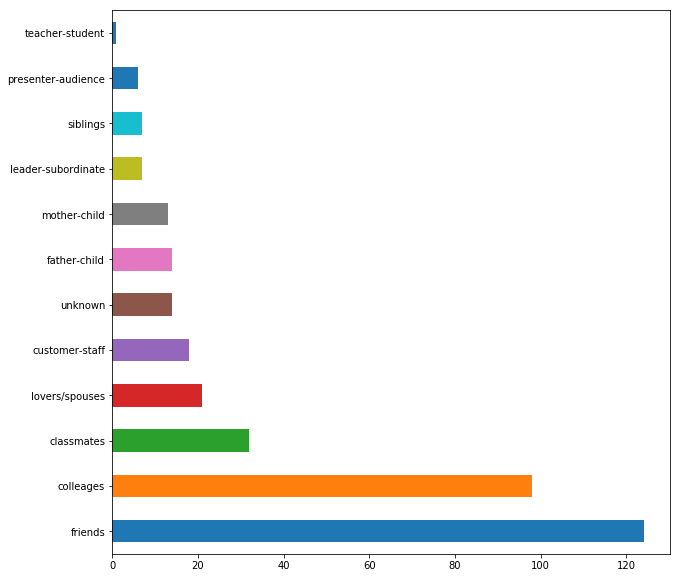

In [13]:
#extended_labels_df.label.value_counts().plot(kind='pie', figsize=(10, 10))
extended_labels_df.label.value_counts().plot(kind='barh', figsize=(10, 10))

In [14]:
all_labels_df = pd.concat([train_labels_df, test_labels_df, extended_labels_df])

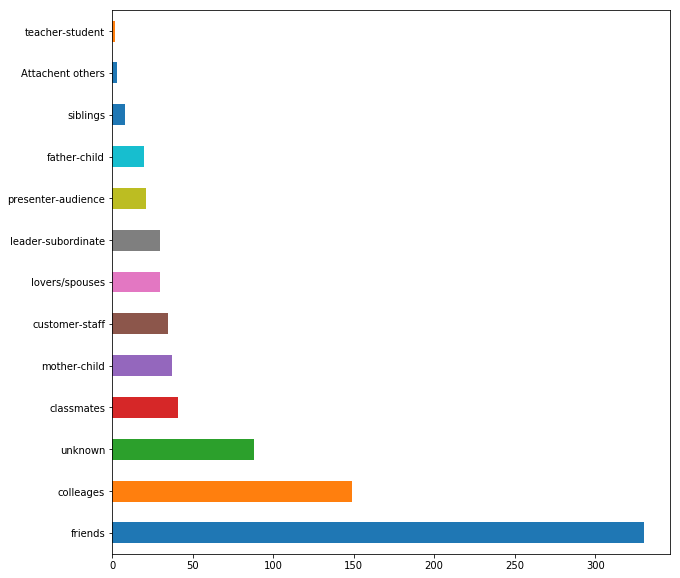

In [15]:
all_labels_df.label.value_counts().plot(kind='barh', figsize=(10, 10))

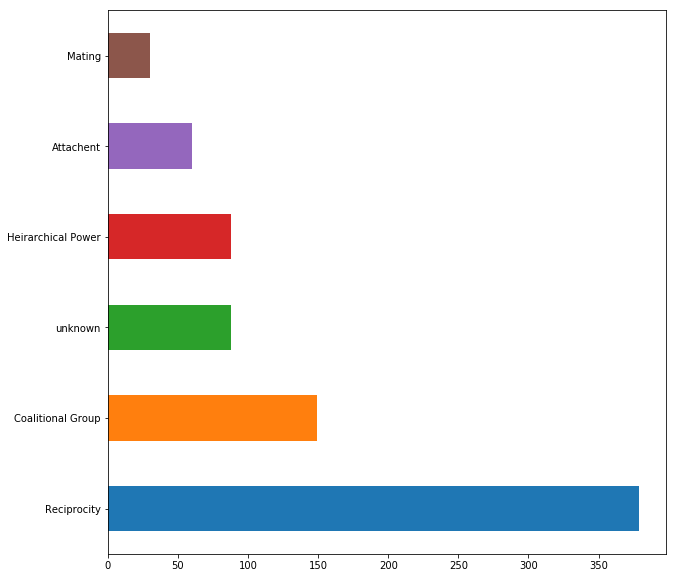

In [17]:
all_labels_df.domain_label.value_counts().plot(kind='barh', figsize=(10, 10))

In [18]:
relations = all_labels_df.label
filtered_labels = relations[relations != 'unknown']
counts = filtered_labels.value_counts()
counts[counts > 10]

friends               330
colleages             149
classmates             41
mother-child           37
customer-staff         35
lovers/spouses         30
leader-subordinate     30
presenter-audience     21
father-child           20
Name: label, dtype: int64

In [19]:
domains = all_labels_df.domain_label
filtered_labels = domains[domains != 'unknown']
counts = filtered_labels.value_counts()
counts[counts > 10]

Reciprocity           379
Coalitional Group     149
Heirarchical Power     88
Attachent              60
Mating                 30
Name: domain_label, dtype: int64